In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras

In [2]:
# Загрузка данных
df = pd.read_csv('USA_Housing (1).csv')
print("Первые 5 строк данных:")
print(df.head())
print("\nИнформация о данных:")
print(df.info())

print("\nСтатистическое описание данных:")
pd.set_option('display.float_format', lambda x: '%0.4f' % x)
print(df.describe())

Первые 5 строк данных:
   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathle

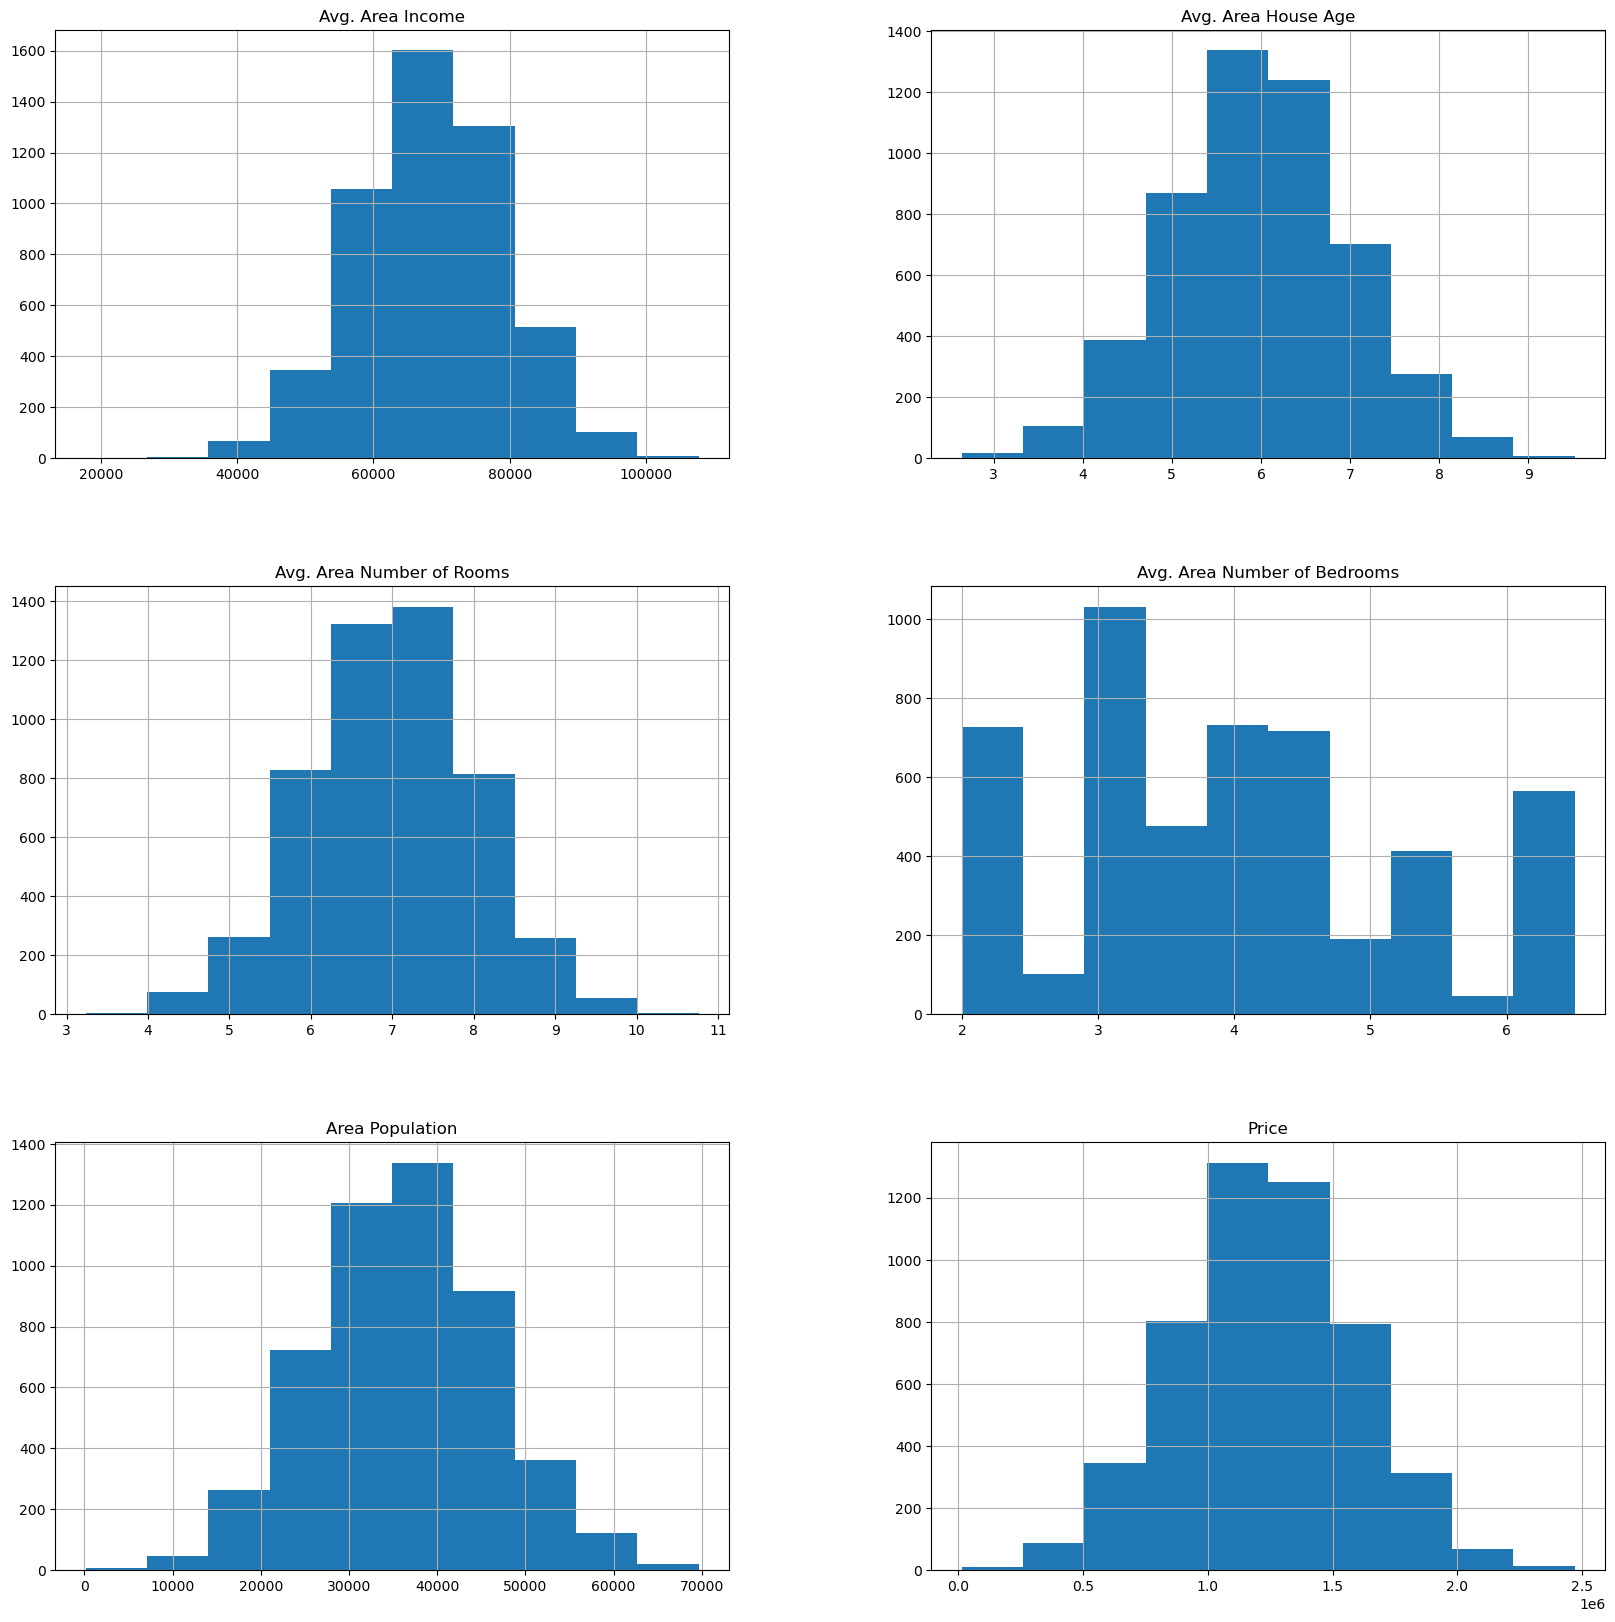

<Figure size 800x600 with 0 Axes>

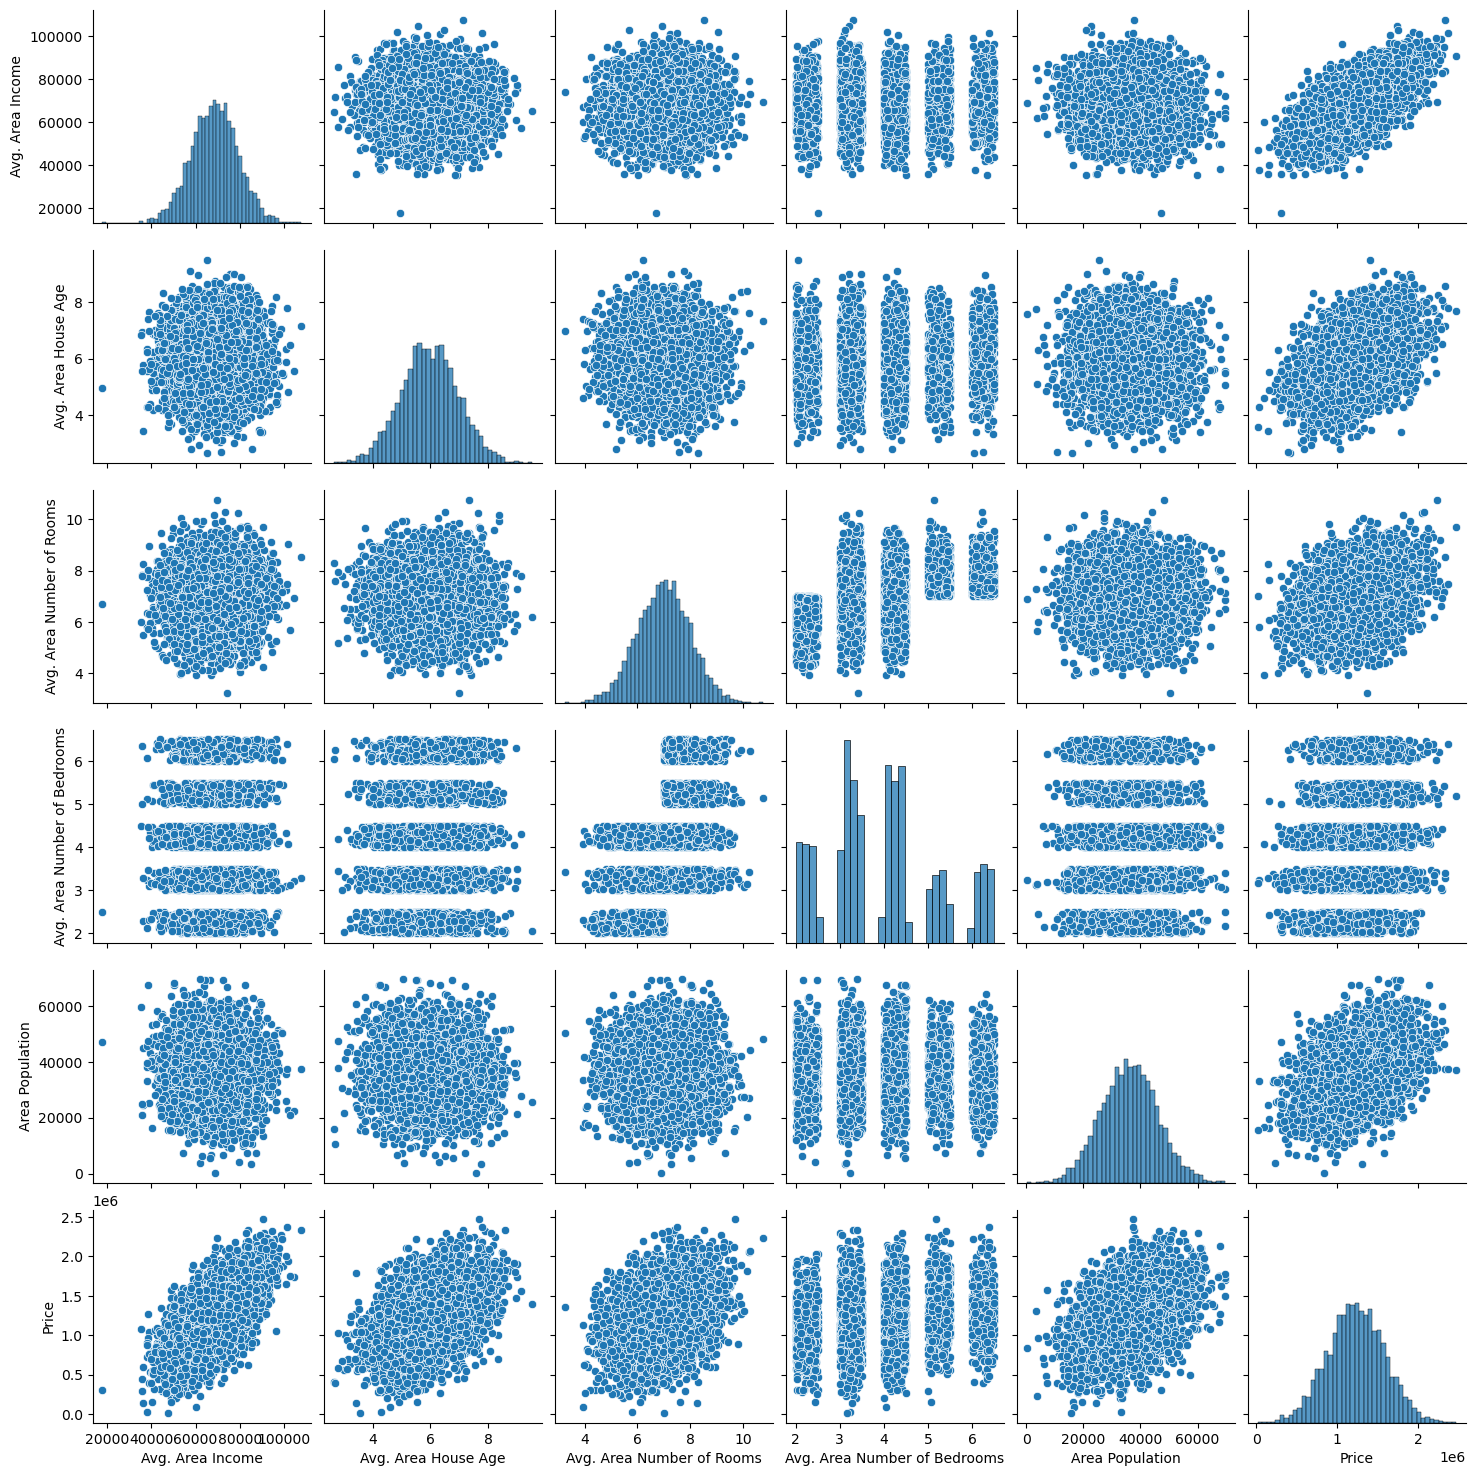

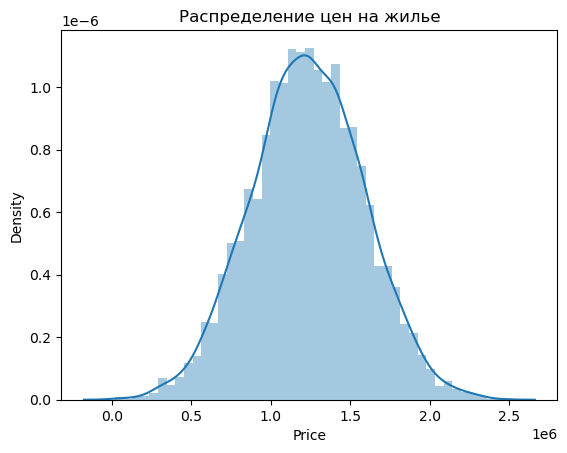

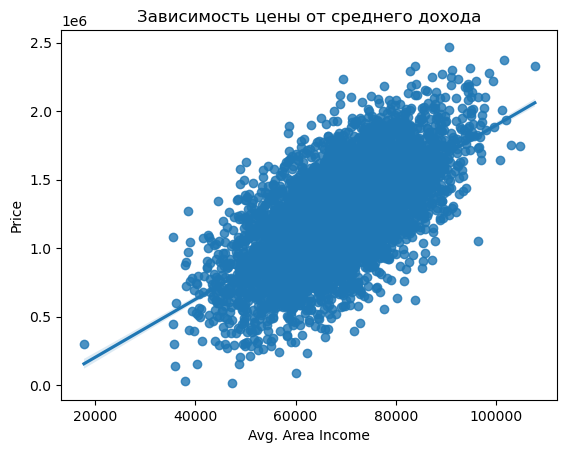

In [3]:
# Гистограммы
df.hist(figsize=(20,20))
plt.show()

# Парные графики
plt.figure(figsize=(8,6))
sns.pairplot(df)
plt.show()

# Распределение цен
sns.distplot(df['Price'])
plt.title('Распределение цен на жилье')
plt.show()

# Зависимость цены от дохода
sns.regplot(y='Price', x='Avg. Area Income', data=df)
plt.title('Зависимость цены от среднего дохода')
plt.show()


Корреляционная матрица:
                              Avg. Area Income  Avg. Area House Age  \
Avg. Area Income                        1.0000              -0.0020   
Avg. Area House Age                    -0.0020               1.0000   
Avg. Area Number of Rooms              -0.0110              -0.0094   
Avg. Area Number of Bedrooms            0.0198               0.0061   
Area Population                        -0.0162              -0.0187   
Price                                   0.6397               0.4525   

                              Avg. Area Number of Rooms  \
Avg. Area Income                                -0.0110   
Avg. Area House Age                             -0.0094   
Avg. Area Number of Rooms                        1.0000   
Avg. Area Number of Bedrooms                     0.4627   
Area Population                                  0.0020   
Price                                            0.3357   

                              Avg. Area Number of Bedrooms  Are

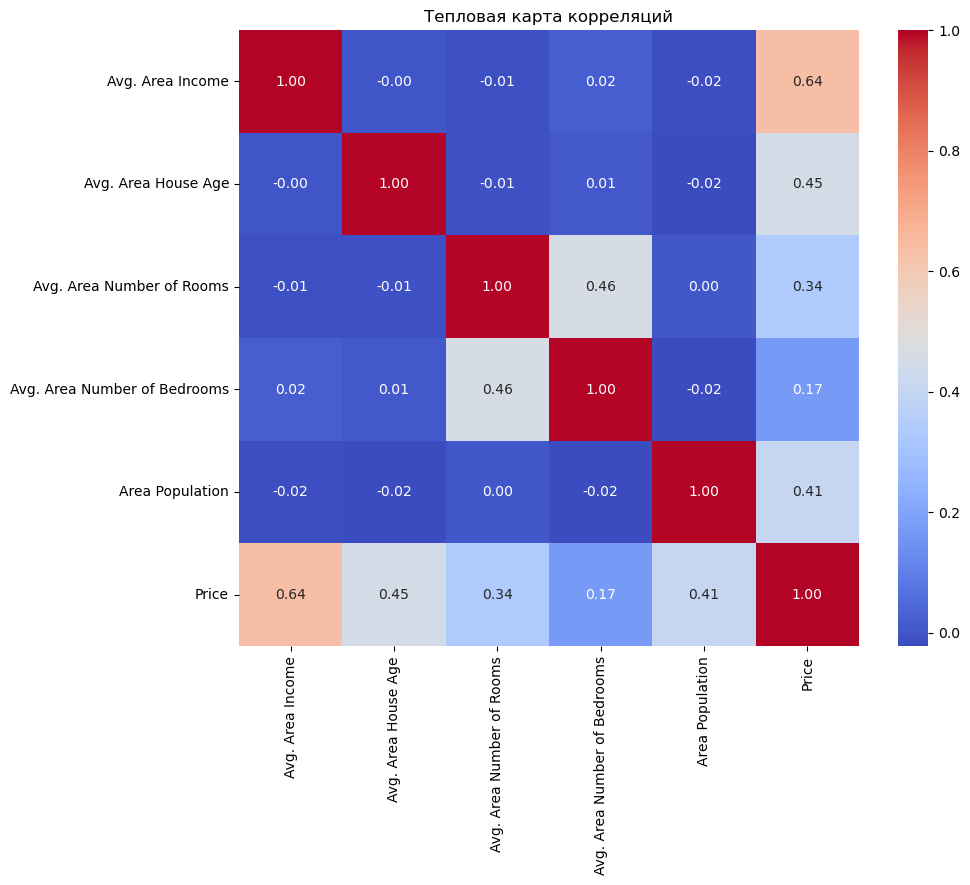

In [4]:
# Корреляционная матрица
corr_matrix = df[['Avg. Area Income', 'Avg. Area House Age','Avg. Area Number of Rooms',
                  'Avg. Area Number of Bedrooms','Area Population', 'Price']].corr()
print("\nКорреляционная матрица:")
print(corr_matrix)

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Тепловая карта корреляций')
plt.show()

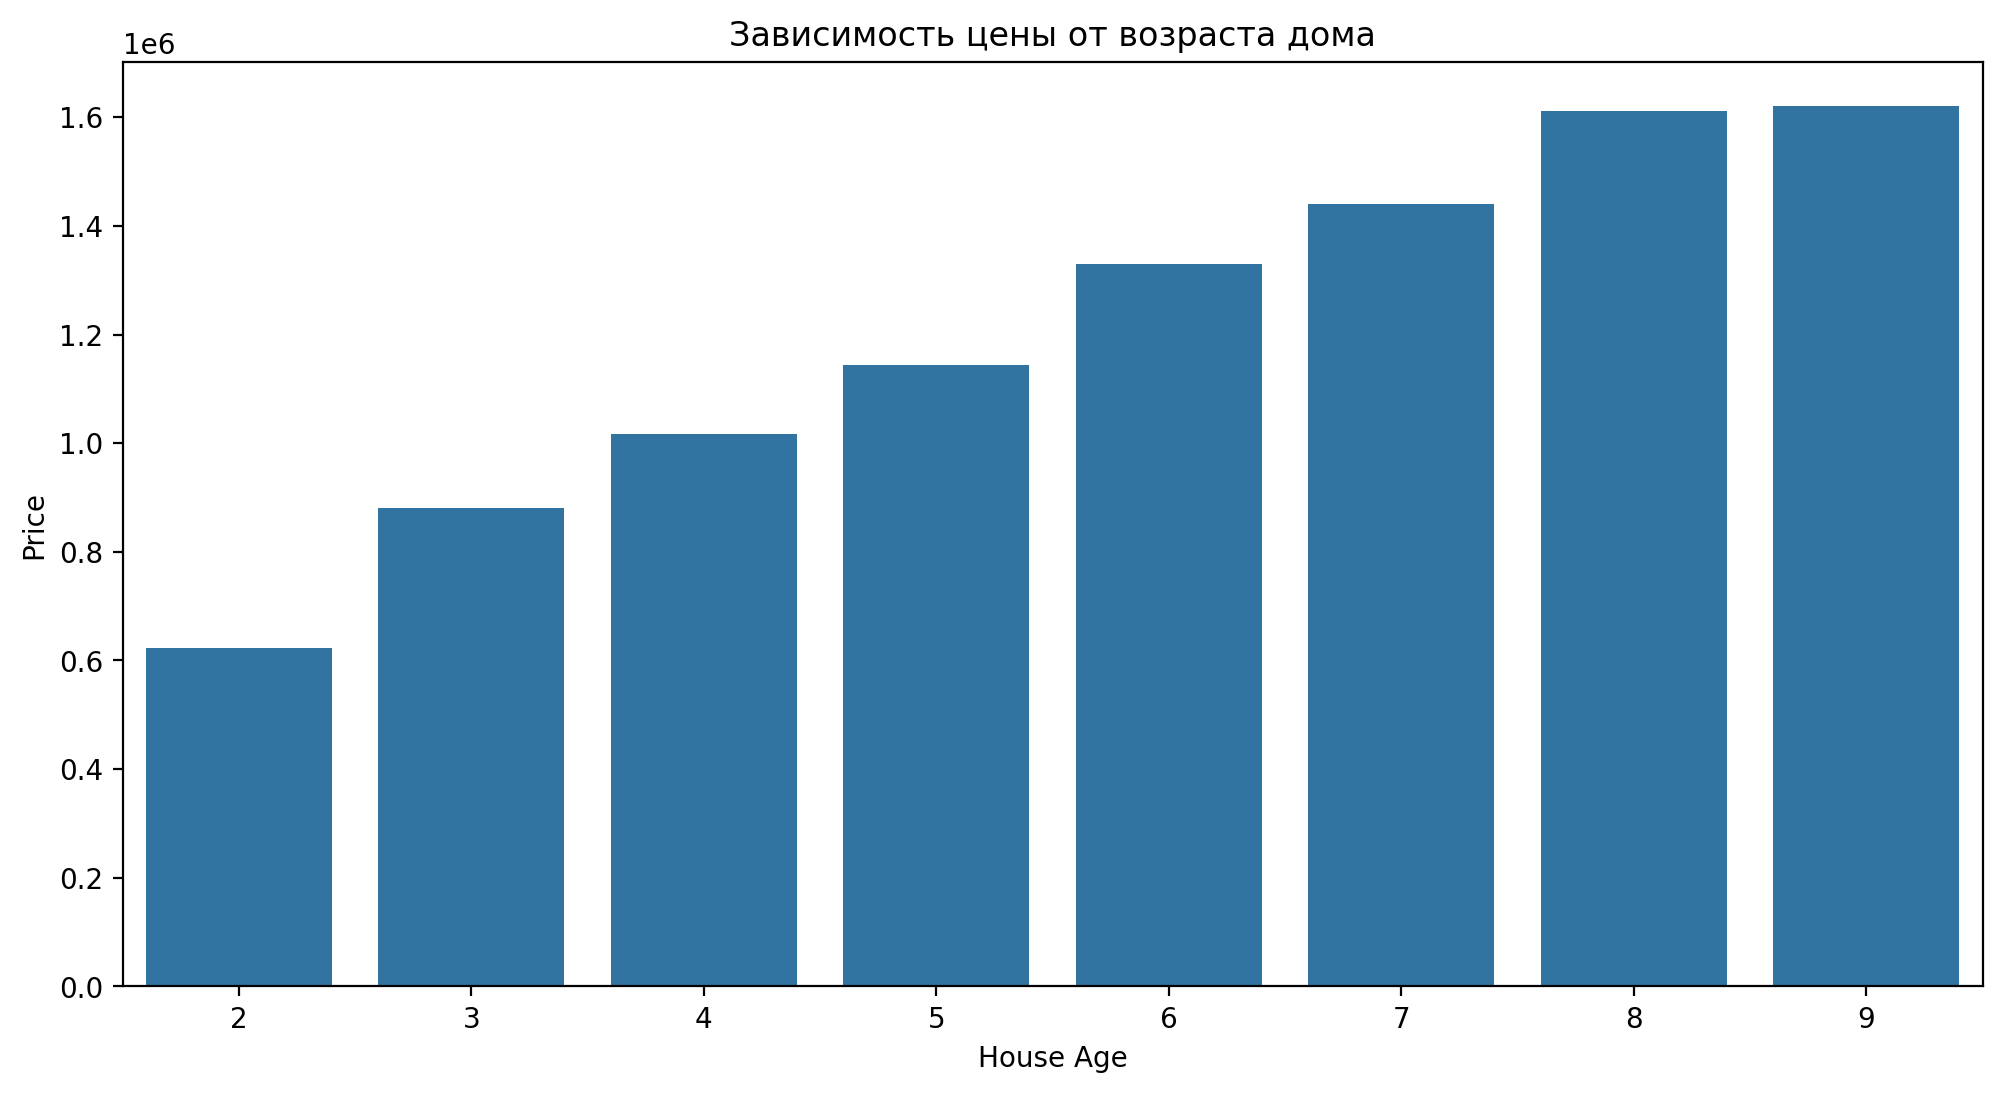

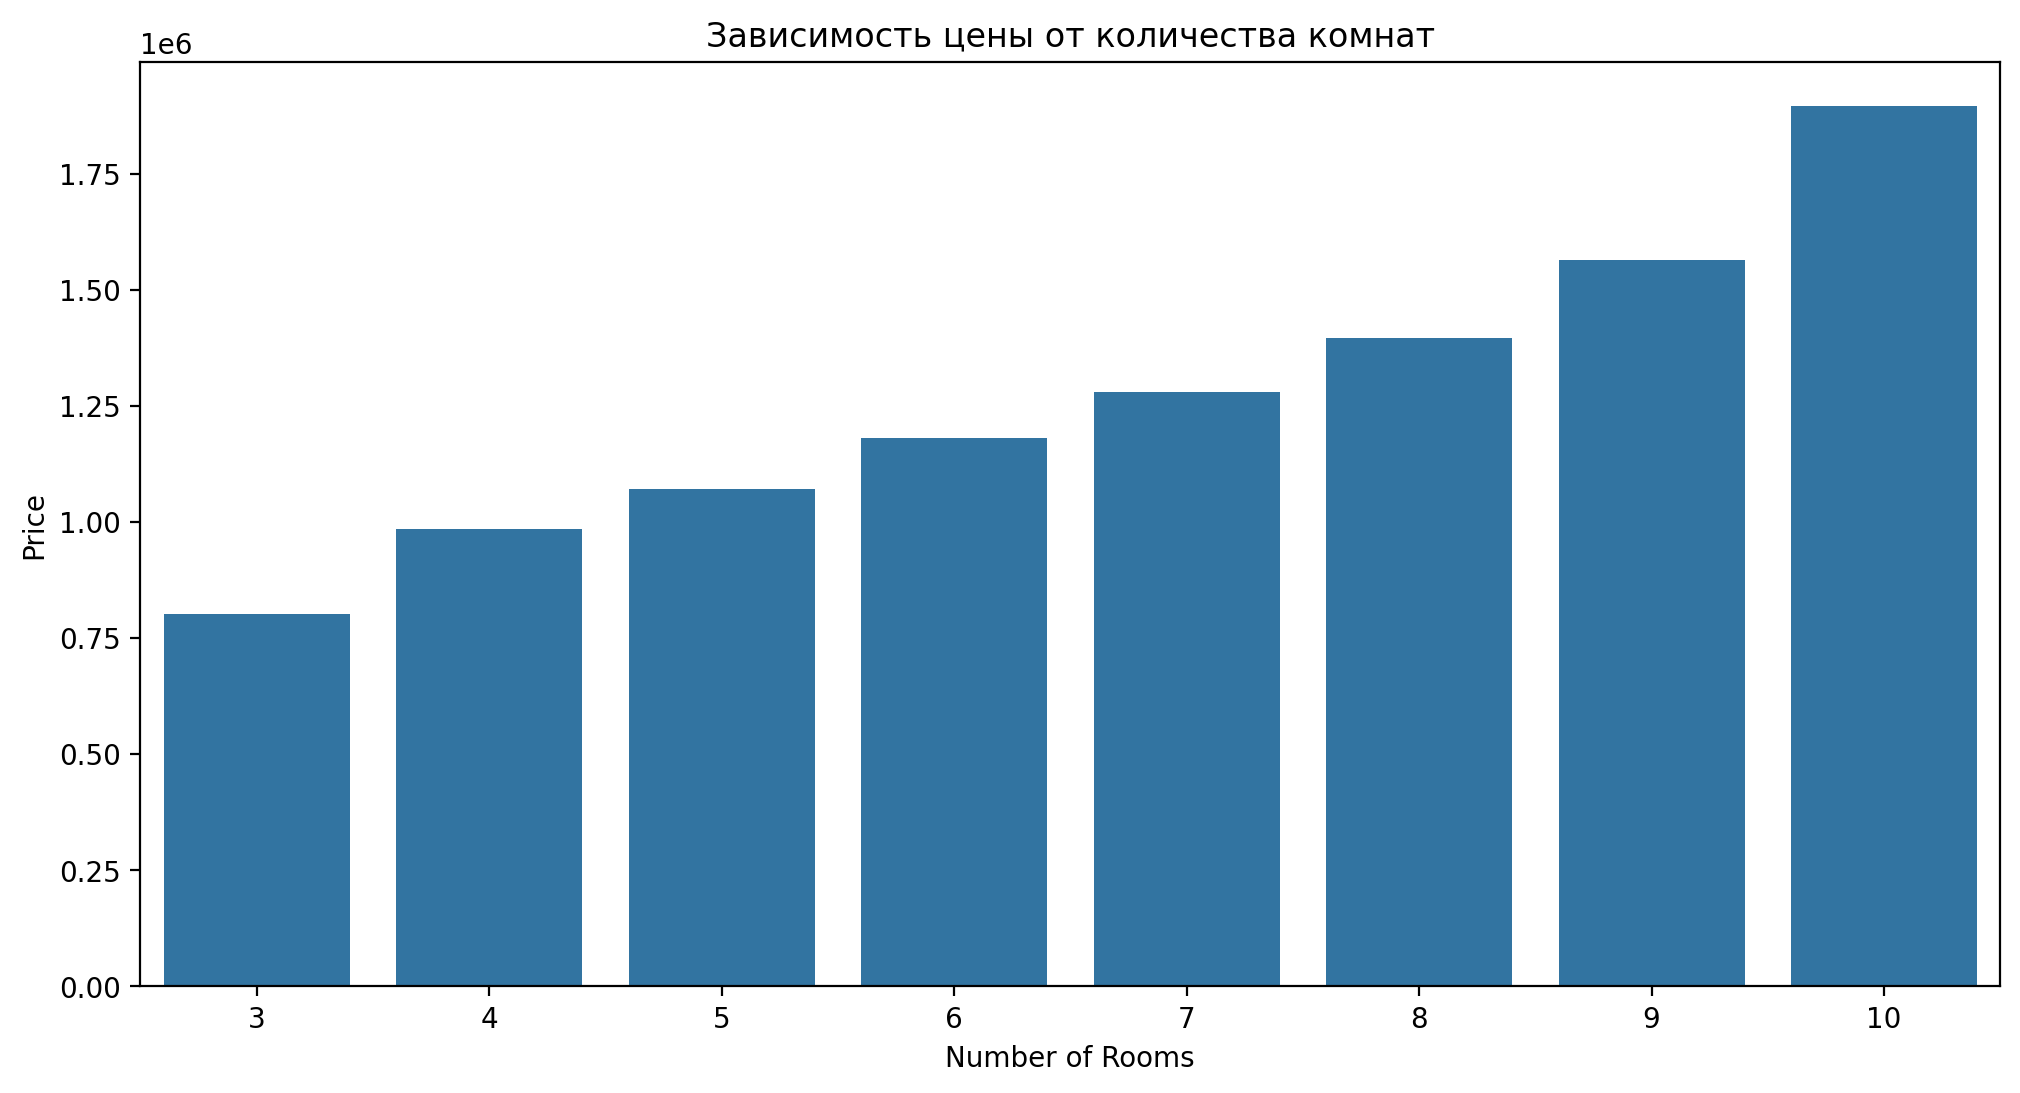

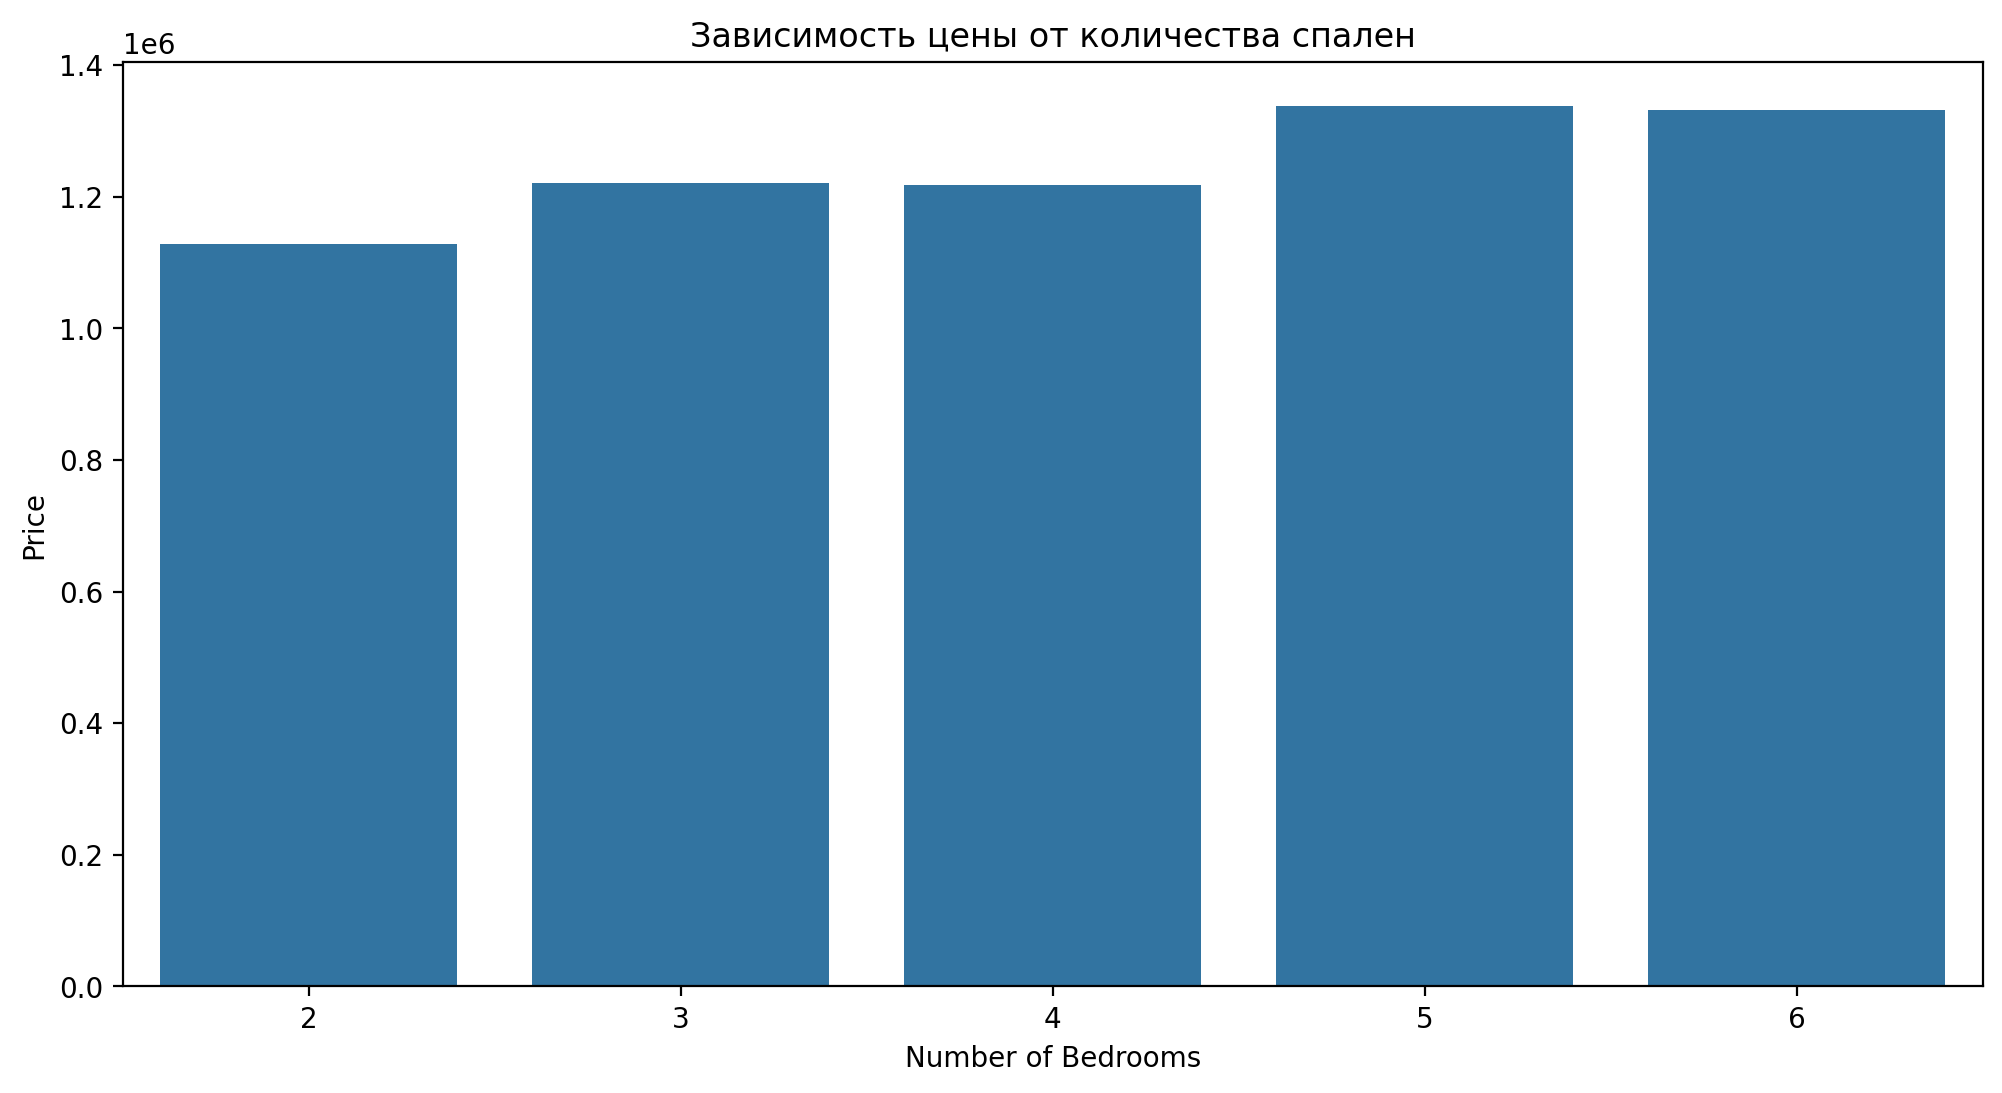

In [5]:
# Зависимость цены от возраста дома
df['House Age'] = df['Avg. Area House Age'].apply(int)
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'House Age', y = 'Price', data = df, ci = None)
plt.title('Зависимость цены от возраста дома')
plt.show()

# Зависимость цены от количества комнат
df['Number of Rooms'] = df['Avg. Area Number of Rooms'].apply(int)
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'Number of Rooms', y = 'Price', data = df, ci = None)
plt.title('Зависимость цены от количества комнат')
plt.show()

# Зависимость цены от количества спален
df['Number of Bedrooms'] = df['Avg. Area Number of Bedrooms'].apply(int)
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'Number of Bedrooms', y = 'Price', data = df, ci = None)
plt.title('Зависимость цены от количества спален')
plt.show()

In [6]:
# Подготовка данных
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
y = df['Price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Нормализация данных для нейронной сети
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

In [7]:
print("\n" + "="*50)
print("МОДЕЛЬ 1: ЛИНЕЙНАЯ РЕГРЕССИЯ")
print("="*50)

from sklearn.linear_model import LinearRegression
lrm = LinearRegression()
lrm.fit(X_train, y_train)

print(f"Свободный член (intercept): {lrm.intercept_:.4f}")
print(f"Коэффициенты: {lrm.coef_}")

# Прогнозы линейной регрессии
predictions_lr = lrm.predict(X_test)


МОДЕЛЬ 1: ЛИНЕЙНАЯ РЕГРЕССИЯ
Свободный член (intercept): -2638673.4262
Коэффициенты: [2.16257989e+01 1.65590393e+05 1.19827783e+05 2.36109526e+03
 1.52165814e+01]


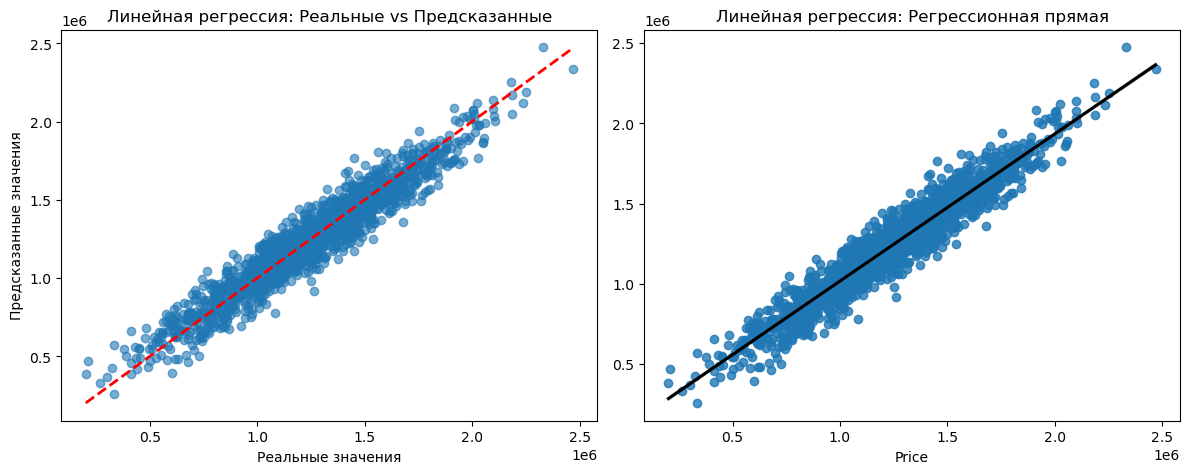

In [8]:
# Визуализация результатов линейной регрессии
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions_lr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Линейная регрессия: Реальные vs Предсказанные')

plt.subplot(1, 2, 2)
sns.regplot(x=y_test, y=predictions_lr, line_kws={"color":"black"})
plt.title('Линейная регрессия: Регрессионная прямая')

plt.tight_layout()
plt.show()

In [9]:
# Оценка линейной регрессии
from sklearn import metrics
mae_lr = metrics.mean_absolute_error(y_test, predictions_lr)
mse_lr = metrics.mean_squared_error(y_test, predictions_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = metrics.r2_score(y_test, predictions_lr)

print(f"\nМетрики линейной регрессии:")
print(f"MAE (Средняя абсолютная ошибка): {mae_lr:.2f}")
print(f"MSE (Среднеквадратичная ошибка): {mse_lr:.2f}")
print(f"RMSE (Корень из MSE): {rmse_lr:.2f}")
print(f"R² (Коэффициент детерминации): {r2_lr:.4f}")


Метрики линейной регрессии:
MAE (Средняя абсолютная ошибка): 81135.57
MSE (Среднеквадратичная ошибка): 10068422551.40
RMSE (Корень из MSE): 100341.53
R² (Коэффициент детерминации): 0.9147


In [10]:
print("\n" + "="*50)
print("МОДЕЛЬ 2: НЕЙРОННАЯ СЕТЬ")
print("="*50)

# Создание модели нейронной сети
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1)
])

# Компиляция модели
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)


МОДЕЛЬ 2: НЕЙРОННАЯ СЕТЬ


In [11]:
# Обучение модели
print("\nОбучение нейронной сети...")
history = model.fit(
    X_train_scaled, y_train_scaled,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=0
)

print("Обучение завершено!")


Обучение нейронной сети...
Обучение завершено!


In [12]:
# Прогнозы нейронной сети
predictions_nn_scaled = model.predict(X_test_scaled)
predictions_nn = scaler_y.inverse_transform(predictions_nn_scaled)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


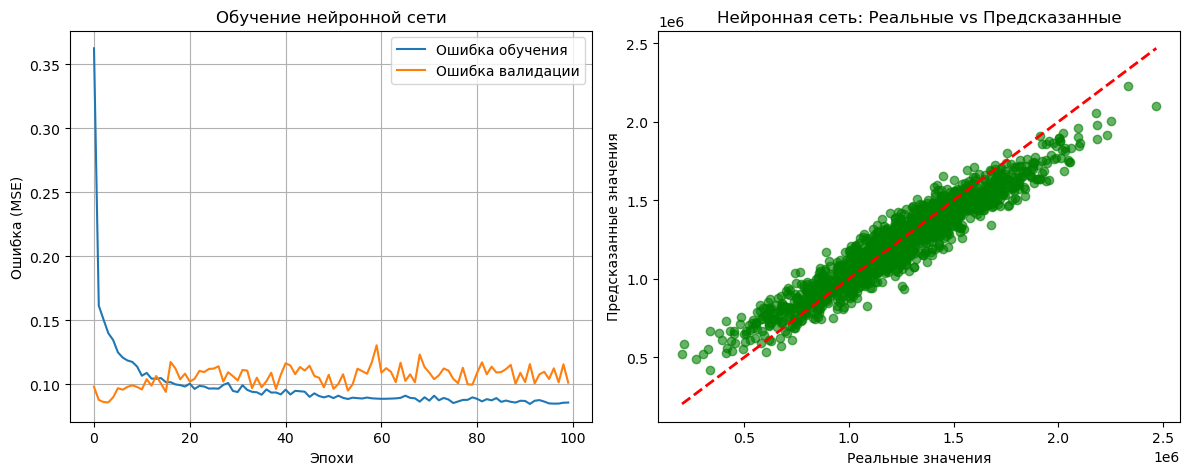

In [13]:
# Визуализация обучения нейронной сети
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Ошибка обучения')
plt.plot(history.history['val_loss'], label='Ошибка валидации')
plt.xlabel('Эпохи')
plt.ylabel('Ошибка (MSE)')
plt.title('Обучение нейронной сети')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_test, predictions_nn, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Нейронная сеть: Реальные vs Предсказанные')

plt.tight_layout()
plt.show()

In [14]:
# Оценка нейронной сети
mae_nn = metrics.mean_absolute_error(y_test, predictions_nn)
mse_nn = metrics.mean_squared_error(y_test, predictions_nn)
rmse_nn = np.sqrt(mse_nn)
r2_nn = metrics.r2_score(y_test, predictions_nn)

print(f"\nМетрики нейронной сети:")
print(f"MAE (Средняя абсолютная ошибка): {mae_nn:.2f}")
print(f"MSE (Среднеквадратичная ошибка): {mse_nn:.2f}")
print(f"RMSE (Корень из MSE): {rmse_nn:.2f}")
print(f"R² (Коэффициент детерминации): {r2_nn:.4f}")


Метрики нейронной сети:
MAE (Средняя абсолютная ошибка): 91369.25
MSE (Среднеквадратичная ошибка): 13067133210.09
RMSE (Корень из MSE): 114311.56
R² (Коэффициент детерминации): 0.8893


In [15]:
print("\n" + "="*50)
print("СРАВНЕНИЕ МОДЕЛЕЙ")
print("="*50)

# Создаем DataFrame для сравнения
comparison_df = pd.DataFrame({
    'Метрика': ['MAE', 'MSE', 'RMSE', 'R²'],
    'Линейная регрессия': [mae_lr, mse_lr, rmse_lr, r2_lr],
    'Нейронная сеть': [mae_nn, mse_nn, rmse_nn, r2_nn],
    'Разница': [mae_nn - mae_lr, mse_nn - mse_lr, rmse_nn - rmse_lr, r2_nn - r2_lr]
})

print("\nСравнение метрик:")
print(comparison_df.to_string(index=False))


СРАВНЕНИЕ МОДЕЛЕЙ

Сравнение метрик:
Метрика  Линейная регрессия   Нейронная сеть         Разница
    MAE          81135.5661       91369.2459      10233.6798
    MSE    10068422551.4011 13067133210.0943 2998710658.6932
   RMSE         100341.5295      114311.5620      13970.0325
     R²              0.9147           0.8893         -0.0254


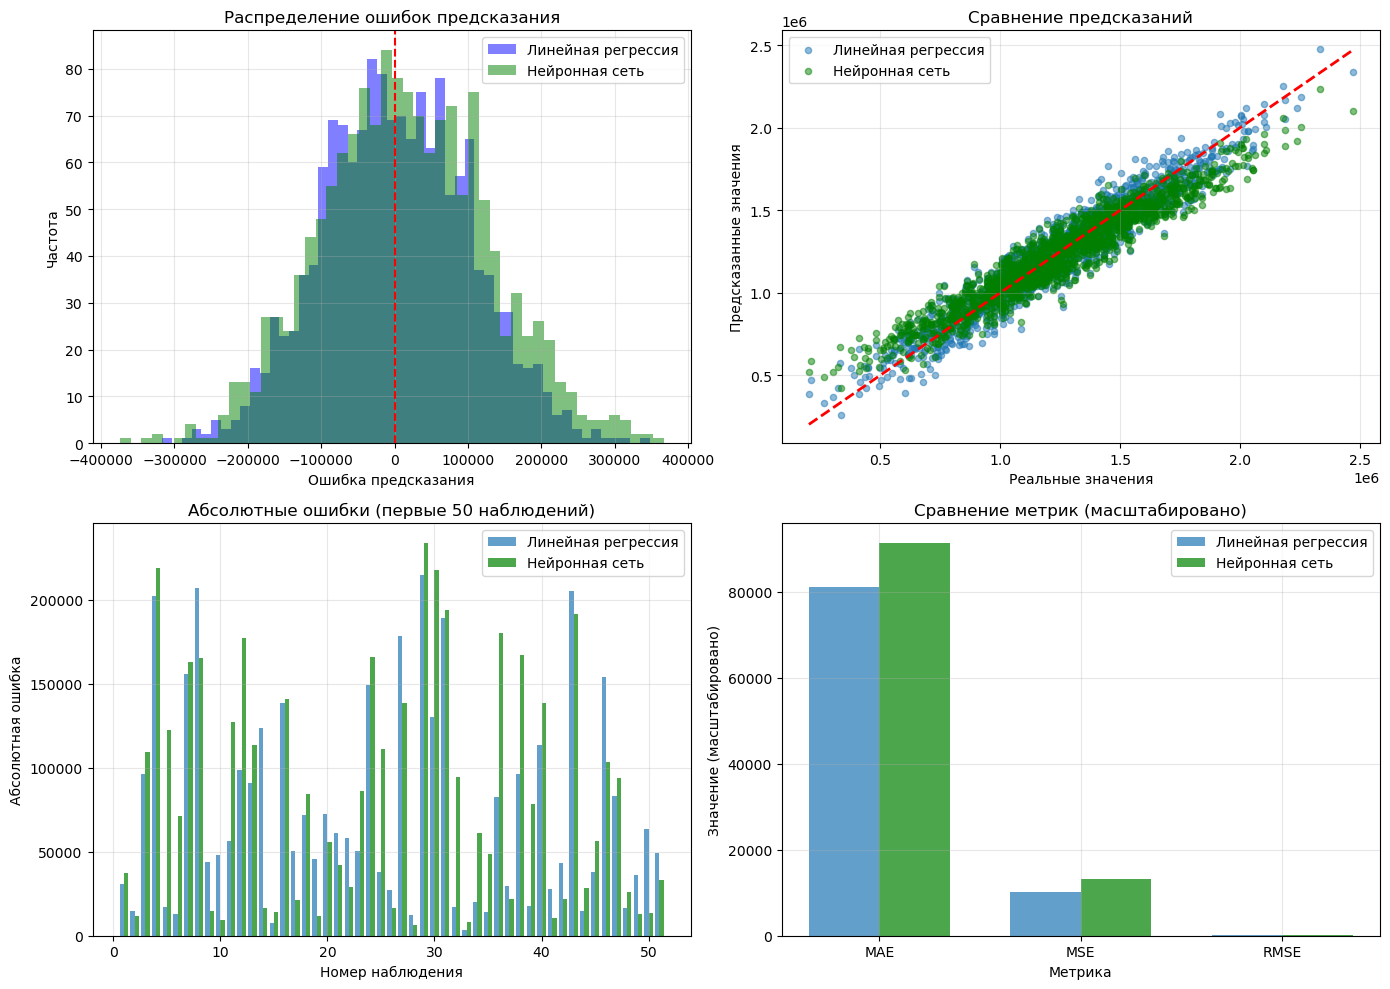

In [16]:
# Визуализация сравнения
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# График 1: Ошибки предсказаний
errors_lr = y_test - predictions_lr
errors_nn = y_test.values.flatten() - predictions_nn.flatten()

axes[0, 0].hist(errors_lr, bins=50, alpha=0.5, label='Линейная регрессия', color='blue')
axes[0, 0].hist(errors_nn, bins=50, alpha=0.5, label='Нейронная сеть', color='green')
axes[0, 0].axvline(x=0, color='red', linestyle='--')
axes[0, 0].set_xlabel('Ошибка предсказания')
axes[0, 0].set_ylabel('Частота')
axes[0, 0].set_title('Распределение ошибок предсказания')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# График 2: Сравнение предсказаний с реальными значениями
axes[0, 1].scatter(y_test, predictions_lr, alpha=0.5, label='Линейная регрессия', s=20)
axes[0, 1].scatter(y_test, predictions_nn, alpha=0.5, label='Нейронная сеть', s=20, color='green')
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 1].set_xlabel('Реальные значения')
axes[0, 1].set_ylabel('Предсказанные значения')
axes[0, 1].set_title('Сравнение предсказаний')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# График 3: Абсолютные ошибки по наблюдениям
sample_indices = np.arange(1, min(51, len(y_test)) + 1)
axes[1, 0].bar(sample_indices - 0.2, np.abs(errors_lr[:len(sample_indices)]), 
                width=0.4, label='Линейная регрессия', alpha=0.7)
axes[1, 0].bar(sample_indices + 0.2, np.abs(errors_nn[:len(sample_indices)]), 
                width=0.4, label='Нейронная сеть', alpha=0.7, color='green')
axes[1, 0].set_xlabel('Номер наблюдения')
axes[1, 0].set_ylabel('Абсолютная ошибка')
axes[1, 0].set_title('Абсолютные ошибки (первые 50 наблюдений)')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# График 4: Сравнение метрик
metrics_names = ['MAE', 'MSE', 'RMSE']
lr_metrics = [mae_lr, mse_lr/1000000, rmse_lr/1000]  # Масштабируем для наглядности
nn_metrics = [mae_nn, mse_nn/1000000, rmse_nn/1000]

x = np.arange(len(metrics_names))
width = 0.35

axes[1, 1].bar(x - width/2, lr_metrics, width, label='Линейная регрессия', alpha=0.7)
axes[1, 1].bar(x + width/2, nn_metrics, width, label='Нейронная сеть', alpha=0.7, color='green')
axes[1, 1].set_xlabel('Метрика')
axes[1, 1].set_ylabel('Значение (масштабировано)')
axes[1, 1].set_title('Сравнение метрик (масштабировано)')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(metrics_names)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [17]:
# Анализ разницы
print("\n" + "="*50)
print("АНАЛИЗ РЕЗУЛЬТАТОВ")
print("="*50)

if r2_nn > r2_lr:
    improvement = ((r2_nn - r2_lr) / r2_lr) * 100
    print(f"Нейронная сеть показала лучший результат на {improvement:.2f}% по R²")
    
    if rmse_nn < rmse_lr:
        rmse_improvement = ((rmse_lr - rmse_nn) / rmse_lr) * 100
        print(f"Снижение RMSE на {rmse_improvement:.2f}%")
else:
    print("Линейная регрессия показала сравнимый или лучший результат")

print("\nВывод:")
if r2_nn > r2_lr + 0.01:  # Если разница значительна
    print("Нейронная сеть показала значительное улучшение по сравнению с линейной регрессией.")
elif abs(r2_nn - r2_lr) < 0.01:
    print("Обе модели показали схожие результаты.")
else:
    print("Линейная регрессия оказалась немного лучше.")


АНАЛИЗ РЕЗУЛЬТАТОВ
Линейная регрессия показала сравнимый или лучший результат

Вывод:
Линейная регрессия оказалась немного лучше.


In [18]:
# Дополнительный анализ: важность признаков для линейной регрессии
print("\n" + "="*50)
print("ВАЖНОСТЬ ПРИЗНАКОВ (Линейная регрессия)")
print("="*50)

feature_importance = pd.DataFrame({
    'Признак': X.columns,
    'Коэффициент': lrm.coef_,
    'Абсолютное значение': np.abs(lrm.coef_)
}).sort_values('Абсолютное значение', ascending=False)

print(feature_importance.to_string(index=False))


ВАЖНОСТЬ ПРИЗНАКОВ (Линейная регрессия)
                     Признак  Коэффициент  Абсолютное значение
         Avg. Area House Age  165590.3927          165590.3927
   Avg. Area Number of Rooms  119827.7834          119827.7834
Avg. Area Number of Bedrooms    2361.0953            2361.0953
            Avg. Area Income      21.6258              21.6258
             Area Population      15.2166              15.2166


In [19]:
# Создаем тестовый пример для демонстрации
print("\n" + "="*50)
print("ТЕСТОВЫЙ ПРИМЕР ПРОГНОЗА")
print("="*50)

# Создаем тестовый пример (средние значения из данных)
test_example = pd.DataFrame({
    'Avg. Area Income': [70000],
    'Avg. Area House Age': [6],
    'Avg. Area Number of Rooms': [7],
    'Avg. Area Number of Bedrooms': [4],
    'Area Population': [35000]
})

# Прогноз линейной регрессии
lr_pred = lrm.predict(test_example)[0]

# Прогноз нейронной сети (с нормализацией)
test_example_scaled = scaler_X.transform(test_example)
nn_pred_scaled = model.predict(test_example_scaled)
nn_pred = scaler_y.inverse_transform(nn_pred_scaled)[0][0]

print(f"\nТестовый пример:")
print(f"Средний доход: ${test_example['Avg. Area Income'][0]:,.0f}")
print(f"Возраст дома: {test_example['Avg. Area House Age'][0]} лет")
print(f"Количество комнат: {test_example['Avg. Area Number of Rooms'][0]}")
print(f"Количество спален: {test_example['Avg. Area Number of Bedrooms'][0]}")
print(f"Население: {test_example['Area Population'][0]:,.0f}")
print(f"\nПрогноз линейной регрессии: ${lr_pred:,.2f}")
print(f"Прогноз нейронной сети: ${nn_pred:,.2f}")
print(f"Разница: ${abs(lr_pred - nn_pred):,.2f} ({abs((lr_pred - nn_pred)/lr_pred*100):.2f}%)")


ТЕСТОВЫЙ ПРИМЕР ПРОГНОЗА
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step

Тестовый пример:
Средний доход: $70,000
Возраст дома: 6 лет
Количество комнат: 7
Количество спален: 4
Население: 35,000

Прогноз линейной регрессии: $1,249,494.07
Прогноз нейронной сети: $1,251,718.88
Разница: $2,224.81 (0.18%)
